In [1]:
#AD CLICK THROUGH RATE PREDICTION MODEL
#WE ARE GONNA PREDICT WHICH ADS USERS WILL CLICK 
#PROBLEM: HOW DO WE KNOW WHICH USERS WILL CLICK OUR ADS BEFORE SHOWING THEM?
# SOLUTION: TRAIN A MACHINE LEARNING MODEL TO PREDICT CLICKS BASED ON USER BEHAVIOUR , AD TYPWE AND CONTEXT


In [2]:
#STEP -1
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#STEP 2
#LOAD AND EXPLORE DATA
#load the data
df= pd.read_csv("ad_records.csv")
#lets see what we ahve
print('Dataset Shape',df.shape)
print('\n First 5 rows:')
print(df.head())
print('\n Dataypes:')
print(df.dtypes)
print("\n missing values:")
print(df.isnull().sum())

Dataset Shape (10000, 10)

 First 5 rows:
   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country            Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05

Click Distribution:
Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64
Clicked on Ad
0    50.83
1    49.17
Name: proportion, dtype: float64


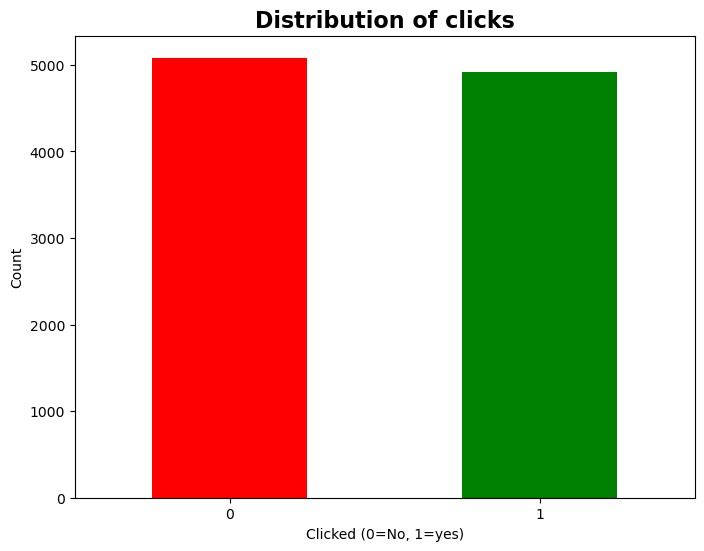

In [4]:
#STEP 3: UNDERSTAND YOUR TARGET VARIABLE
#CHECK THE DISTRIBUTION OF CLICKS
print("Click Distribution:")
#Counts how many times each value appears in the column.
print(df['Clicked on Ad'].value_counts())
#Converts counts into percentages.
#normalize=True converts counts into proportions so we can see the percentage distribution of each class.
print(df['Clicked on Ad'].value_counts(normalize =True)* 100)

#visualize it
plt.figure(figsize=(8,6))
df['Clicked on Ad'].value_counts().plot(kind='bar',color=['Red','Green'])
plt.title('Distribution of clicks',fontsize='16',fontweight='bold')
plt.xlabel('Clicked (0=No, 1=yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



In [5]:
#STEP 4 : FEATURE ENGINERRING
#CONVERTING RAW DATA TO MEANING FULL FEATURES THAT HELP OUR MODEL
useful_features =['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Gender','Country']

#create a copy of relevant columns 
data= df[useful_features + ['Clicked on Ad']].copy()

#converting gender to numbers (male=1,feamle=0)
data['Gender'] = data['Gender'].map({'Male':1,'Female' :0})
data = pd.get_dummies(data, columns=['Country'], drop_first=True)

print("Features after engineering:")
print(data.head())

Features after engineering:
   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  Gender  \
0                     62.26  32.0     69481.85                172.83       1   
1                     41.73  31.0     61840.26                207.17       1   
2                     44.40  30.0     57877.15                172.83       0   
3                     59.88  28.0     56180.93                207.17       0   
4                     49.21  30.0     54324.73                201.58       0   

   Clicked on Ad  Country_Albania  Country_Algeria  Country_American Samoa  \
0              0            False            False                   False   
1              0            False            False                   False   
2              0            False            False                   False   
3              0            False            False                   False   
4              1            False            False                   False   

   Country_Andorra  ..

In [6]:
#STEP 5 PREPARE DATA FOR TRAINING
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
#Why do we fit ONLY on training data?
#Because:
#Training data = what the model is allowed to see
#Test data = future / unseen data
#If you fit on test data:
#Model indirectly “peeks” into the future
#This is called data leakage

In [8]:
#seperating features X and target y 
X = data.drop('Clicked on Ad', axis=1)
#axis=1 tells pandas to perform the operation on columns, while axis=0 works on rows.
y = data['Clicked on Ad']
#stratify ensures that training and testing datasets have the same class distribution as the original data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#scale the features (make them all on similar scale)
#StandardScaler: Makes all numbers on similar scale (age vs income are very different ranges!)
scaler = StandardScaler()
#fit() learns information from the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples:{len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples:8000
Testing samples: 2000


In [9]:
#STEP 6 TRAINING THE MODEL
model= LogisticRegression(random_state=42,max_iter=1000)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)

#checking accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy *100:.2f}%")
print("\n Deatiled Report:")
print(classification_report(y_test,y_pred, target_names=['No Click','Click']))

Model Accuracy: 82.15%

 Deatiled Report:
              precision    recall  f1-score   support

    No Click       0.83      0.82      0.82      1017
       Click       0.81      0.83      0.82       983

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [10]:
import joblib

joblib.dump(model, "ad_click_model.pkl")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']

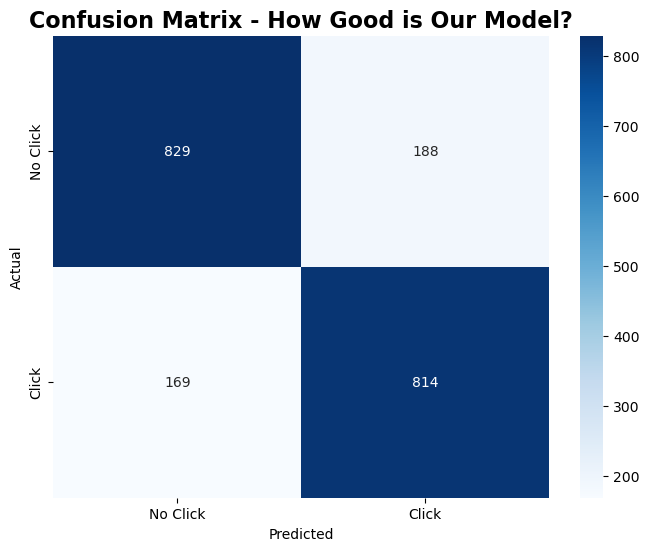

In [11]:
#STEP 7: VISALIZE MODEL PERFROMANCE
#create confusion matrix 
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues',xticklabels=['No Click','Click'],yticklabels=['No Click','Click'])
plt.title("Confusion Matrix - How Good is Our Model?",fontsize='16',fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
import numpy as np
import pandas as pd

def predict_ad_click(Daily_Time_Spent_on_Site,
                     Age,
                     Area_Income,
                     Daily_Internet_Usage,
                     Gender,
                     Country):
    """
    Predict probability of clicking an ad using Logistic Regression
    """

    # Convert gender to numeric
    gender_numeric = 1 if Gender.lower() == 'male' else 0

    # 1️⃣ Base input (non-country features)
    input_dict = {
        'Daily Time Spent on Site': Daily_Time_Spent_on_Site,
        'Age': Age,
        'Area Income': Area_Income,
        'Daily Internet Usage': Daily_Internet_Usage,
        'Gender': gender_numeric
    }

    # 2️⃣ Add ALL country columns as 0
    for col in scaler.feature_names_in_:
        if col.startswith("Country_"):
            input_dict[col] = 0

    # 3️⃣ Activate selected country
    country_col = f"Country_{Country}"
    if country_col in input_dict:
        input_dict[country_col] = 1
    else:
        raise ValueError(f"Country '{Country}' was not seen during training")

    # 4️⃣ Create DataFrame in EXACT training order
    input_data = pd.DataFrame(
        [input_dict],
        columns=scaler.feature_names_in_
    )

    # 5️⃣ Scale & predict
    input_scaled = scaler.transform(input_data)
    click_probability = model.predict_proba(input_scaled)[0][1]

    return click_probability


In [13]:
import streamlit as st
import joblib
import pandas as pd

# ---------------- CONFIG ----------------
st.set_page_config(
    page_title="Ad Click Prediction",
    page_icon="📢",
    layout="centered"
)

@st.cache_resource
def load_assets():
    model = joblib.load("ad_click_model.pkl")
    scaler = joblib.load("scaler.pkl")
    return model, scaler

model, scaler = load_assets()

# ---------------- HEADER ----------------
st.markdown(
    "<h1 style='text-align:center;'>📢 Ad Click Prediction</h1>",
    unsafe_allow_html=True
)
st.markdown(
    "<p style='text-align:center;'>Predict the likelihood of a user clicking an online advertisement</p>",
    unsafe_allow_html=True
)
st.divider()

# ---------------- INPUT SECTION ----------------
st.subheader("🧍 User Information")

col1, col2 = st.columns(2)

with col1:
    Daily_Time_Spent_on_Site = st.slider(
        "🕒 Daily Time Spent on Site (minutes)",
        0, 120, 60
    )

    Age = st.slider(
        "🎂 Age",
        10, 80, 30
    )

with col2:
    Area_Income = st.number_input(
        "💰 Area Income",
        min_value=0.0,
        step=1000.0,
        help="Average income of user's area"
    )

    Daily_Internet_Usage = st.slider(
        "🌐 Daily Internet Usage (minutes)",
        0, 300, 150
    )

Gender = st.radio("⚧ Gender", ["Male", "Female"], horizontal=True)

# Country dropdown (auto from model)
country_list = sorted(
    [c.replace("Country_", "") for c in scaler.feature_names_in_
     if c.startswith("Country_")]
)
Country = st.selectbox("🌍 Country", country_list)

st.divider()

# ---------------- PREDICTION ----------------
if st.button("🔮 Predict Click Probability", use_container_width=True):

    gender_numeric = 1 if Gender == "Male" else 0

    # Base input
    input_dict = {
        "Daily Time Spent on Site": Daily_Time_Spent_on_Site,
        "Age": Age,
        "Area Income": Area_Income,
        "Daily Internet Usage": Daily_Internet_Usage,
        "Gender": gender_numeric
    }

    # Country one-hot encoding
    for col in scaler.feature_names_in_:
        if col.startswith("Country_"):
            input_dict[col] = 0

    input_dict[f"Country_{Country}"] = 1

    input_data = pd.DataFrame(
        [input_dict],
        columns=scaler.feature_names_in_
    )

    input_scaled = scaler.transform(input_data)
    prob = model.predict_proba(input_scaled)[0][1]
    prob_percent = prob * 100

    # ---------------- OUTPUT ----------------
    st.subheader("📊 Prediction Result")

    st.progress(prob)

    st.markdown(
        f"<h2 style='text-align:center;'>{prob_percent:.2f}%</h2>",
        unsafe_allow_html=True
    )

    if prob >= 0.5:
        st.success("✅ High chance the user will CLICK the ad")
    else:
        st.warning("⚠️ Low chance the user will click the ad")

    st.caption("Prediction based on user behavior, demographics, and location.")


2026-01-19 21:02:19.397 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:19.403 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.621 
  command:

    streamlit run C:\Users\krish\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-19 21:02:20.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.631 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runni

2026-01-19 21:02:20.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.786 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.787 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 21:02:20.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run app.py


In [ ]:
predict_ad_click(
    Daily_Time_Spent_on_Site=65.5,
    Age=28,
    Area_Income=55000,
    Daily_Internet_Usage=180,
    Gender='Male'
)


In [ ]:
predict_ad_click(
    Daily_Time_Spent_on_Site=30.2,
    Age=55,
    Area_Income=75000,
    Daily_Internet_Usage=120,
    Gender='Female'
)


In [ ]:
predict_ad_click(
    Daily_Time_Spent_on_Site=80,
    Age=22,
    Area_Income=44000,
    Daily_Internet_Usage=250,
    Gender='Male'
)
